# Uso básico de Python en estadística descriptiva

En este ejemplo haremos un análisis estadístico básico de un conjunto de datos que contiene especificaciones técnicas para carros nuevos en el 2004 en los Estados Unidos. Los archivos que deben ser descargados y ubicados en la misma carpeta con este notebook son:

- Descripción del conjunto de datos: [04cars.txt](http://www.amstat.org/publications/jse/datasets/04cars.txt)
- Conjunto de datos: [04cars.dat.txt](http://www.amstat.org/publications/jse/datasets/04cars.dat.txt)

### Configuración inicial del notebook

Primero nos ubicamos en el directorio de trabajo, donde están todos los archivos de interés.

In [1]:
#Modifique la variable MYPATH a la dirección de la carpeta donde tiene el archivo *.dat.txt
MYPATH = "/home/carlos/Dropbox/Probability/Homeworks/HW1_1/"
%cd -q $MYPATH

Luego cargamos todos los modulos necesarios de Python

In [2]:
#importe la librería de cálculo númerico de Python
import numpy as np
#Configurar el notebook para graficar en linea. Esta es una magic function!
%matplotlib inline
#importar la libreria de graficación de Python
import matplotlib.pyplot as plt
import pandas
import scipy.stats as stats

### Lectura de los datos a analizar

Ahora cargamos el conjunto de datos de las variables de interés

In [3]:
pfile = open("04cars.dat.txt") #Abrir el archivo que tiene los datos

num_of_observations = 428;   #El archivo tiene 428 muestras
num_of_cols = 8;             #Las 7 primeras columnas binarias corresponden a la variable cualitativa tipo de
                             #carro (Sport, Sport utility, Wagon, Minivan, Pickup, All-Wheel drive o Rear-Wheel 
                             #drive). La columna 8 corresponde a la variable cuantitativa Precio sugerido (Suggested
                             #retail price).
data = np.zeros((num_of_observations, num_of_cols));  #Una matrix para guardar los datos
i = 0;
#Leemos el archivo linea por linea
for line in pfile:
    columns = line[46:65].split() #tomamos solo las columnas que corresponden a las variables de interes y dividimos
                                  #con split() la cadena de caracteres para obtener las 8 columnas de datos
    for j in range(num_of_cols):        
        data[i][j] = float(columns[j]);   #guardamos las 8 columnas de cada linea del archivo en una fila de la
                                          #matriz
    i += 1
pfile.close()  #cerramos el archivo

### Descripción de una variable cualitativa

Ahora contruiremos la tabla de distribución de frecuencias para la variable "Tipo de carro":

In [4]:
#Con esta linea es posible imprimir un objeto de datos de Pandas como una tabla en el notebook
pandas.set_option('display.notebook_repr_html', True)

In [5]:
# Las categorias de carros
categories = ["Sports Car", "Sport Utility Vehicle", "Wagon", "Minivan", "Pickup",
              "All-Wheel Drive", "Rear-Wheel Drive", "Other"]
columns = ["Frecuencia", "Frecuencia relativa"] #vamos a tabular la frecuencia absoluta y relativa de cada categoria

In [6]:
#Calculando la frecuencia absoluta
frequencies = np.zeros((8,2))
frequencies[0:7,0] = np.sum(data[:,0:7], axis=0)  #Por cada columna (categoria), suma todas las filas (muestras)
#Hay algunos carros que no están en las primeras 7 categorias. Esto lo contamos con la categoria  "Other".
frequencies[7,0] = num_of_observations - np.sum(frequencies[0:7,0]); 
#Calculando la frecuencia relativa
frequencies[:, 1] = frequencies[:, 0] / num_of_observations;

In [7]:
df=pandas.DataFrame(frequencies, categories, columns)
df.index.name = "Categoria"
df.reset_index()

,Categoria,Frecuencia,Frecuencia relativa
0,Sports Car,49.0,0.114486
1,Sport Utility Vehicle,60.0,0.140187
2,Wagon,30.0,0.070093
3,Minivan,20.0,0.046729
4,Pickup,24.0,0.056075
5,All-Wheel Drive,92.0,0.214953
6,Rear-Wheel Drive,110.0,0.257009
7,Other,43.0,0.100467


Gráfica de barras de la variable

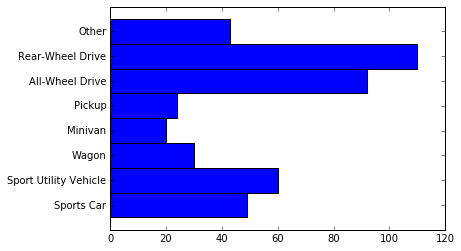

In [8]:
width = 1
x = range(8)
plt.barh(x, frequencies[:,0], width, color="blue", 
         tick_label=["Sports Car", "Sport Utility Vehicle", "Wagon",
                     "Minivan", "Pickup", "All-Wheel Drive", "Rear-Wheel Drive", "Other"], 
         align="center");

### Descripción de una variable cuantitativa

Ahora vamos a trabajar con la variable cuantitativa "Precio sugerido (Retail price)". Primero la tabla de distribución de frecuencias. El [criterio](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) para determinar el número $k$ de intervalos es la raíz cuadrada del número de muestras $n$:

$$k = \sqrt{n}$$

In [9]:
nbins = np.sqrt(num_of_observations) #calcula la raiz cuadrada del numero de muestras
nbins = int(np.ceil(nbins))  #aproxima al siguiente entero
x = data[:,7]; #guarda las muestras de la variable cuantitativa en x

#Divide el soporte de la variable en nbins intervalos y guarda la frecuencia absoluta para cada intervalo en hist
hist, binedges = np.histogram(x, bins=nbins);  #bindegdes tiene los limites de cada intervalo  

frequencies = np.zeros((nbins,4)); 
frequencies[:, 0] = hist;   #Frecuencia absoluta
frequencies[:, 1] = hist / num_of_observations; #Frecuencia relativa 
frequencies[:, 2] = np.cumsum(hist)  #Frecuencia acumulada
frequencies[:, 3] = frequencies[:, 2] / num_of_observations; #Frecuencia relativa acumulada

# Limites de los intervalos
binnames = [];
for i in range(nbins):
    label = "%.2f - %.2f" % (binedges[i], binedges[i+1]) 
    binnames.append(label)

columns = ["Frecuencia", "Frecuencia relativa", "Frecuencia acumulada", "Frecuencia relativa acumulada"];
df = pandas.DataFrame(frequencies, binnames, columns)
df.index.name = "Intervalo"
df.reset_index()

,Intervalo,Frecuencia,Frecuencia relativa,Frecuencia acumulada,Frecuencia relativa acumulada
0,1028.00 - 1895.52,79.0,0.184579,79.0,0.184579
1,1895.52 - 2763.05,135.0,0.315421,214.0,0.500000
2,2763.05 - 3630.57,89.0,0.207944,303.0,0.707944
3,3630.57 - 4498.10,55.0,0.128505,358.0,0.836449
4,4498.10 - 5365.62,30.0,0.070093,388.0,0.906542
5,5365.62 - 6233.14,9.0,0.021028,397.0,0.927570
6,6233.14 - 7100.67,8.0,0.018692,405.0,0.946262
7,7100.67 - 7968.19,10.0,0.023364,415.0,0.969626
8,7968.19 - 8835.71,6.0,0.014019,421.0,0.983645
9,8835.71 - 9703.24,3.0,0.007009,424.0,0.990654


Histograma:

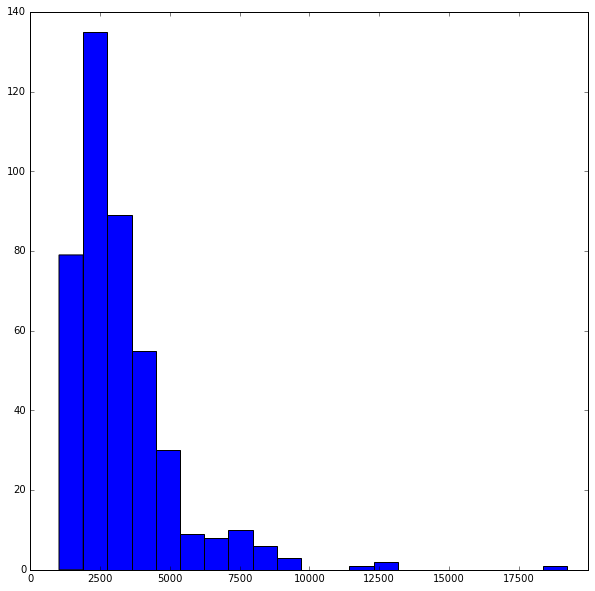

In [10]:
plt.figure(figsize=(10,10))  #Aumenta el tamaño de la figura
plt.hist(x, nbins);  #Grafica el histograma
plt.xticks(range(0,20000,2500));  #Modifica las marcas en el eje x

### Resumen de la variable cuantitativa

A continuación calculamos medidas de tendencia central y de dispersión.

In [11]:
#Media
np.mean(x)

3277.1962616822429

In [12]:
#Mediana
np.median(x)

2763.5

In [13]:
#Moda
mode, count = stats.mode(x)
print("La moda es %.2f y se repite %d veces" % (mode, count))

La moda es 1327.00 y se repite 2 veces


In [14]:
#Rango interquartil
Q3 = np.percentile(x, 75) #Tercer cuartil
Q1 = np.percentile(x, 25) #Primer cuartil
IQR = Q3 - Q1;
print("El rango intercuartil es ", IQR)

El rango intercuartil es  1887.25


Dos posibles formas de calcular la varianza muestral de $N$ datos con media muestral $\bar{x}$:

\begin{equation}
s_N = \frac{1}{N} \sum\limits_i (x_i - \bar{x})^2
\tag{1}
\end{equation}

\begin{equation}
s_{N-1} = \frac{1}{N-1} \sum\limits_i (x_i - \bar{x})^2
\tag{2}
\end{equation}

En la función var() de numpy, ddof es 0 ó 1 cuando calculamos $s_{N}$ o $s_{N-1}$. Por defecto, ddof=0. 

In [15]:
#Varianza
var = np.var(x, ddof=1)
print("La varianza muestral es ", var)

La varianza muestral es  3775970.00823


In [16]:
#Desviación estándar
std = np.sqrt(var)
print("La desviación estándar es ", std)

La desviación estándar es  1943.18553109
